In [79]:
import matplotlib.pyplot as plt # library for ploting
import networkx as nx # library for making the graph

# Depth First Search

In [76]:
def dfs(graph, start, goal):
    '''
    performing depth first search on a graph to find the path from start node to goal node 
    
   Parameters:
    graph (dict): An adjacency list representation of the graph where each key is a node
                  and the corresponding value is a list of neighboring nodes.
    start : The starting node.
    goal : The goal node.
    
   Returns:
    tuple or None: A tuple containing the path from the start node to the goal node
                   and the order in which nodes were visited during the traversal.
                   If no path is found from the start to the goal node, returns None.
    
    Algorithm:
        1. Initialize a stack with a tuple containing the starting node and a list containing only the starting node.
        2. Initialize an empty set to keep track of visited nodes.
        3. Initialize an empty list to store the order in which nodes are visited.
        4. Iterate while the stack is not empty:
            a. Pop a vertex and its corresponding path from the stack.
            b. Append the popped vertex to the order list.
            c. If the popped vertex is the goal node, return the path and the order.
            d. Add the popped vertex to the visited set.
            e. Iterate over the neighbors of the popped vertex:
            i. If a neighbor has not been visited, push a tuple containing the neighbor
                and the extended path onto the stack.
        5. If no path from the start to the goal node is found, return None.

    '''
    stack = [(start, [start])]
    visited = set()  
    order = []
    while stack:
        (vertex, path) = stack.pop()
        order.append(vertex)
        if vertex == goal:
            return path, order
        visited.add(vertex) 
        for next_vertex in graph[vertex]:
            if next_vertex not in visited:
                stack.append((next_vertex, path + [next_vertex]))
    return None


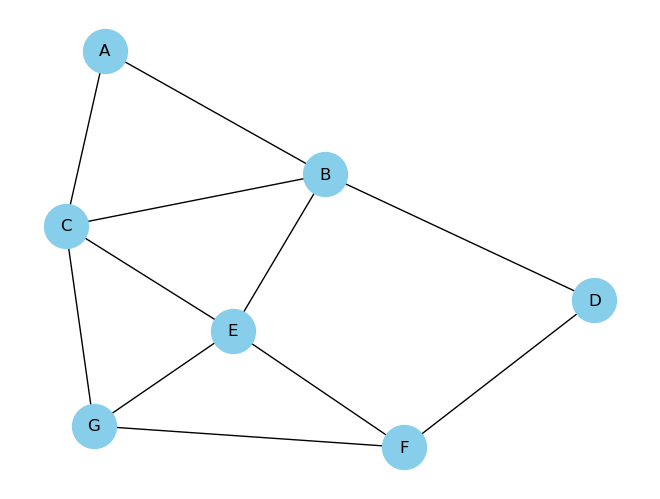

In [77]:
graph_dfs = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'E', 'G'],
    'D': ['B', 'F'],
    'E': ['B', 'C', 'F', 'G'],
    'F': ['D', 'E', 'G'],
    'G': ['C', 'E', 'F']
}

G = nx.Graph()

for node, neighbors in graph_dfs.items():
    G.add_node(node)
    for neighbor in neighbors:
        G.add_edge(node, neighbor)


nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12)
plt.show()

In [78]:
path, order = dfs(graph_dfs,'A','F')
print("path: " + str(path))
print("order of vist: "+str(order))

path: ['A', 'C', 'G', 'F']
order of vist: ['A', 'C', 'G', 'F']


# Breadth First Search

In [72]:
def bfs(graph, start, goal):
    '''
    Performing breadth first search a graph to find a shortest path from a start node to a goal node.

    Parameters:
        graph (dict): An adjacency list representation of the graph where each key is a node
                      and the corresponding value is a list of neighboring nodes.
        start : The starting node.
        goal : The goal node.

    Returns:
        tuple or None: A tuple containing the shortest path from the start node to the goal node
                       and the order in which nodes were visited during the traversal.
                       If no path is found from the start to the goal node, returns None.

    Algorithm:
        1. Initialize a queue with a tuple containing the starting node and a list containing only the starting node.
        2. Initialize an empty set to keep track of visited nodes.
        3. Initialize an empty list to store the order in which nodes are visited.
        4. Iterate while the queue is not empty:
            a. Dequeue a vertex and its corresponding path from the queue.
            b. Append the dequeued vertex to the order list.
            c. If the dequeued vertex is the goal node, return the path and the order.
            d. Add the dequeued vertex to the visited set.
            e. Iterate over the neighbors of the dequeued vertex:
                i. If a neighbor has not been visited, enqueue a tuple containing the neighbor
                   and the extended path onto the queue, and mark the neighbor as visited.
        5. If no path from the start to the goal node is found, return None.
    
    '''
    queue = [(start, [start])]
    visited = set()
    order = []
    while queue:
        (vertex, path) = queue.pop(0)
        order.append(vertex)
        if vertex == goal:
            return path, order
        visited.add(vertex)
        for next_vertex in graph[vertex]:
            if next_vertex not in visited:
                queue.append((next_vertex, path + [next_vertex]))
                visited.add(next_vertex)
    return None

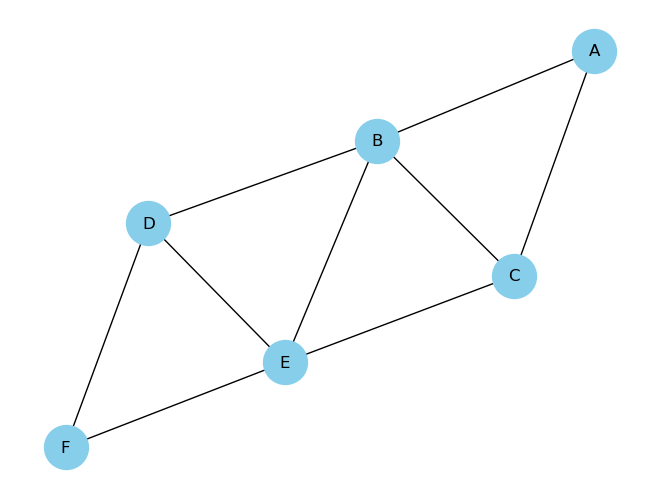

In [74]:
G = nx.Graph()

graph_bfs = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'E', 'D'],
    'C': ['A', 'B', 'E'],
    'E': ['B', 'D', 'F'],
    'D': ['B', 'E', 'F'],
    'F': ['D', 'E'],
}

for node, neighbors in graph_bfs.items():
    G.add_node(node)
    for neighbor in neighbors:
        if (neighbor, node) not in G.edges():
            G.add_edge(node, neighbor)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12)
plt.show()

In [75]:
path, order = bfs(graph_bfs,'A','F')
print("path: " + str(path))
print("order of vist: "+str(order))

path: ['A', 'B', 'E', 'F']
order of vist: ['A', 'B', 'C', 'E', 'D', 'F']


# Uniform-Cost Search

In [84]:
def cost_func(arr):
    '''
    A utility function to extract the cost from a tuple so it be passed to sort function and be sorted.

    Parameters:
        arr (tuple): A tuple representing a vertex and its associated cost.

    Returns:
        float: The cost associated with the vertex.
    
    '''
    
    return arr[0][1]

def ucs(graph, start, goal):
    '''
    Performing Uniform Cost Search on a graph to find the lowest-cost path from a start node to a goal node.

    Parameters:
        graph (dict): An adjacency list representation of the graph where each key is a node
                      and the corresponding value is a list of tuples containing neighboring nodes
                      and their associated costs.
        start : The starting node
        goal : The goal node 

    Returns:
        list or None: A list containing the lowest-cost path from the start node to the goal node.
                      If no path is found from the start to the goal node, returns None.

    Algorithm:
        1. Initialize a priority queue with a tuple containing the starting node, its associated cost (0),
           and a list containing only the starting node.
        2. Iterate while the priority queue is not empty:
            a. Sort the priority queue based on the cost of each vertex using the cost_func utility function.
            b. Dequeue a vertex, its associated cost, and its corresponding path from the front of the priority queue.
            c. If the dequeued vertex is the goal node, return its corresponding path.
            d. Iterate over the neighboring vertices of the dequeued vertex:
                i. If a neighboring vertex is not already in the current path, enqueue a tuple containing
                   the neighboring vertex, the updated path (including the neighboring vertex), and the cumulative
                   cost (original cost plus the cost associated with the neighboring vertex) onto the priority queue.
        3. If no path from the start to the goal node is found, return None.
    
    '''
    
    
    queue = [((start, 0), [start])]

    while queue:
        queue.sort(key=cost_func)
        (vertex, path) = queue.pop(0)
        if vertex[0] == goal:
            return path

        for next_vertex in graph[vertex[0]]:
            if next_vertex not in path:
                queue.append((next_vertex, path + [next_vertex]))
                
    return None



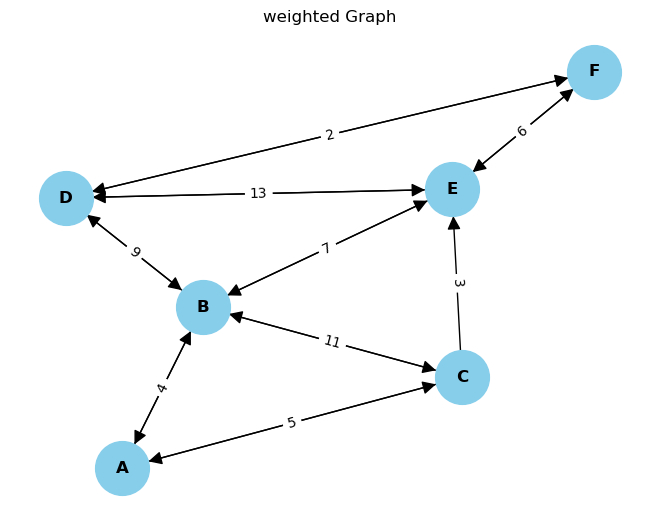

In [82]:
graph = {
    'A': [('B', 4), ('C', 5)],
    'B': [('A', 4), ('C', 11), ('E',7), ('D', 9)],
    'C': [('A',5), ('B', 11),('E', 3)],
    'E': [('B', 7), ('D', 13), ('F', 6)],
    'D': [('B', 9), ('E', 13),('F', 2)],
    'F': [('D', 2), ('E', 6)],
}

G = nx.DiGraph()

for node, edges in graph.items():
    for edge in edges:
        G.add_edge(node, edge[0], weight=edge[1])

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("weighted Graph")
plt.show()

In [85]:
print(ucs(graph, 'A','F'))

['A', ('C', 5), ('E', 3), ('F', 6)]
